In [10]:
import json
import re

# 读取 JSON 文件
with open('/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/filter_geoqa+_1_10_scalebbox3.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

total_bbox_count = 0
conversation_count = 0

# 遍历每个样本
for sample in data:
    if 'conversations' in sample:
        for conversation in sample['conversations']:
            if conversation['from'] == 'gpt' and '<CAPTION>' in conversation['value']:
                # 正则表达式提取 CAPTION 中的 bbox（例如：[0.0, 0.405, 0.998, 0.705]）
                bboxes = re.findall(r'\[\d+\.\d+,\s*\d+\.\d+,\s*\d+\.\d+,\s*\d+\.\d+\]', conversation['value'])
                total_bbox_count += len(bboxes)
                conversation_count += 1

# 计算平均 bbox 数量
average_bbox_per_conversation = total_bbox_count / conversation_count if conversation_count > 0 else 0

# 输出 bbox 的数量和平均值
print(f"Total number of bounding boxes found: {total_bbox_count}")
print(f"Average number of bounding boxes per conversation: {average_bbox_per_conversation:.2f}")

Total number of bounding boxes found: 129897
Average number of bounding boxes per conversation: 5.44


In [31]:
import json

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/fego_1_10_scale_bbox3.json'
with open(file_path, 'r') as f:
    data1 = json.load(f)

reference_box = [0, 0, 1, 1]  # The reference box to compare against

# 统计符合条件和总的边框数量
iou_threshold = 0.5
count_exceeding_threshold = 0
total_boxes = 0

for sample_data in data1:
    for conversation in sample_data.get("conversations", []):
        if not conversation or "<CAPTION>" not in conversation or "<REASONING>" not in conversation:
            conversation['<CAPTION>'] = None
            conversation['<REASONING>'] = None

        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if items:
                for item in items:
                    bbox = item.get("bbox", None)
                    if bbox is not None:
                        total_boxes += 1  # 增加总数量5
                        iou = calculate_iou(bbox, reference_box)
                        if iou > iou_threshold:
                            count_exceeding_threshold += 1

# 计算符合条件的框所占的比例
if total_boxes > 0:
    proportion = count_exceeding_threshold / total_boxes
else:
    proportion = 0
print(total_boxes)
print(f"Number of bounding boxes with IoU > {iou_threshold}: {count_exceeding_threshold}")
print(f"Proportion of bounding boxes with IoU > {iou_threshold}: {proportion:.2%}")

135789
Number of bounding boxes with IoU > 0.5: 2070
Proportion of bounding boxes with IoU > 0.5: 1.52%


In [13]:
import json

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/fego_1_10_scale_bbox3.json'
with open(file_path, 'r') as f:
    data1 = json.load(f)

reference_box = [0, 0, 1, 1]  # The reference box to compare against

unique_boxes = set()

for sample_data in data1:
    for conversation in sample_data.get("conversations", []):
        if not conversation or "<CAPTION>" not in conversation or "<REASONING>" not in conversation:
            conversation['<CAPTION>'] = None
            conversation['<REASONING>'] = None

        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if items:
                for item in items:
                    bbox = item.get("bbox", None)
                    if bbox is not None:
                        # 将bounding box转换为元组并添加到集合中
                        unique_boxes.add(tuple(bbox))

# 打印不重复的框的数量
print(f"Number of unique bounding boxes: {len(unique_boxes)}")

Number of unique bounding boxes: 71489


In [7]:
import json

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/1_10/cogagent/iou3-bbox.json'
with open(file_path, 'r') as f:
    data1 = json.load(f)

unique_caption_boxes = set()
total_caption_boxes = 0

for sample_data in data1:
    for conversation in sample_data.get("conversations", []):
        if not conversation or "<CAPTION>" not in conversation:
            continue
        
        items = conversation.get("<CAPTION>", [])
        if items:
            for item in items:
                bbox = item.get("bbox", None)
                if bbox is not None:
                    total_caption_boxes += 1
                    unique_caption_boxes.add(tuple(bbox))

# 计算不重复的CAPTION框的数量
num_unique_caption_boxes = len(unique_caption_boxes)
if total_caption_boxes > 0:
    proportion_unique = num_unique_caption_boxes / total_caption_boxes
else:
    proportion_unique = 0

# 打印结果
print(total_caption_boxes)
print(f"Number of unique bounding boxes in <CAPTION>: {num_unique_caption_boxes}")
print(f"Proportion of unique bounding boxes in <CAPTION>: {proportion_unique:.2%}")

48575
Number of unique bounding boxes in <CAPTION>: 30464
Proportion of unique bounding boxes in <CAPTION>: 62.72%


In [5]:
import pandas as pd
import re

def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

# 读取Excel文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/cot-1_10-iou3/T20250408_G854caaca/cot-1_10-iou3_MME_auxmatch.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

reference_box = [0, 0, 1, 1]  # The reference box

bbox_pattern = re.compile(r'\[(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*)\]')

total_bboxes = 0
num_iou_exceeding_0_7 = 0
iou_threshold = 0.8
total_samples = len(df)

for index, row in df.iterrows():
    answer_text = row['prediction']
    
    # 找到所有bbox
    bboxes = bbox_pattern.findall(answer_text)
    total_bboxes += len(bboxes)

    # 计算IOU并统计符合条件的个数
    for bbox_str in bboxes:
        bbox = list(map(float, bbox_str))
        iou = calculate_iou(bbox, reference_box)
        if iou > 0.8:
            num_iou_exceeding_0_7 += 1

# 计算每个样本中bbox个数的平均值，以及比例
average_bboxes_per_sample = total_bboxes / total_samples if total_samples > 0 else 0
proportion_iou_exceeding = num_iou_exceeding_0_7 / total_bboxes if total_bboxes > 0 else 0
print(total_bboxes)
print(f"Average number of bboxes per sample: {average_bboxes_per_sample}")
print(f"Number of bboxes with IoU > {iou_threshold}: {num_iou_exceeding_0_7}")
print(f"Proportion of bboxes with IoU > {iou_threshold}: {proportion_iou_exceeding:.2%}")

10237
Average number of bboxes per sample: 4.312131423757371
Number of bboxes with IoU > 0.8: 1896
Proportion of bboxes with IoU > 0.8: 18.52%


In [ ]:
# mme
import pandas as pd
import re

def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

def analyze_samples(subset_df, iou_threshold):
    reference_box = [0, 0, 1, 1]  # Reference box
    bbox_pattern = re.compile(r'\[(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*)\]')

    total_bboxes = 0
    num_iou_exceeding_0_7 = 0
    unique_bboxes_set = set()
    total_samples = len(subset_df)

    for index, row in subset_df.iterrows():
        answer_text = row.get('prediction', '')
        
        # 找到所有bbox
        bboxes = bbox_pattern.findall(answer_text)
        total_bboxes += len(bboxes)

        # 计算IOU并统计符合条件的个数
        for bbox_str in bboxes:
            bbox = list(map(float, bbox_str))
            unique_bboxes_set.add(tuple(bbox))  # Add to unique set
            iou = calculate_iou(bbox, reference_box)
            if iou > iou_threshold:  # 使用阈值0.7
                num_iou_exceeding_0_7 += 1

    # 计算统计数据
    average_bboxes_per_sample = total_bboxes / total_samples if total_samples > 0 else 0
    proportion_iou_exceeding = num_iou_exceeding_0_7 / total_bboxes if total_bboxes > 0 else 0
    unique_bboxes_count = len(unique_bboxes_set)
    proportion_unique_bboxes = unique_bboxes_count / total_bboxes if total_bboxes > 0 else 0

    return average_bboxes_per_sample, proportion_iou_exceeding, unique_bboxes_count, proportion_unique_bboxes, total_bboxes

# 读取Excel文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/llava-cot-27000-iiou3/T20250421_G854caaca/llava-cot-27000-iiou3_MME_auxmatch.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 分别分析答对和答错的样本
correct_samples = df[df['score'] == True]
incorrect_samples = df[df['score'] == False]
iou_threshold = 0.7
correct_avg, correct_proportion, correct_unique_count, correct_proportion_unique, correct_total_bboxes = analyze_samples(correct_samples,iou_threshold)
incorrect_avg, incorrect_proportion, incorrect_unique_count, incorrect_proportion_unique, incorrect_total_bboxes = analyze_samples(incorrect_samples,iou_threshold)

# 打印结果
print("Correct Samples:")
print(f"  correct_total_bboxes: {correct_total_bboxes}")
print(f"  Average number of bboxes per sample: {correct_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {correct_proportion:.2%}")
print(f"  Number of unique bounding boxes: {correct_unique_count}")
print(f"  Proportion of unique bounding boxes: {correct_proportion_unique:.2%}")

print("Incorrect Samples:")
print(f"  incorrect_total_bboxes: {incorrect_total_bboxes}")
print(f"  Average number of bboxes per sample: {incorrect_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {incorrect_proportion:.2%}")
print(f"  Number of unique bounding boxes: {incorrect_unique_count}")
print(f"  Proportion of unique bounding boxes: {incorrect_proportion_unique:.2%}")

Correct Samples:
  correct_total_bboxes: 7332
  Average number of bboxes per sample: 3.750383631713555
  Proportion of bboxes with IoU > 0.7: 3.59%
  Number of unique bounding boxes: 3273
  Proportion of unique bounding boxes: 44.64%
Incorrect Samples:
  incorrect_total_bboxes: 1637
  Average number of bboxes per sample: 3.9069212410501195
  Proportion of bboxes with IoU > 0.7: 4.22%
  Number of unique bounding boxes: 840
  Proportion of unique bounding boxes: 51.31%


In [12]:
# mmstar
import pandas as pd
import re

def calculate_iou(box1, box2):
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

def analyze_samples(subset_df,iou_threshold):
    reference_box = [0, 0, 1, 1]  # Reference box
    bbox_pattern = re.compile(r'\[(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*),\s*(\d+\.?\d*)\]')

    total_bboxes = 0
    num_iou_exceeding_0_7 = 0
    unique_bboxes_set = set()
    total_samples = len(subset_df)

    for index, row in subset_df.iterrows():
        answer_text = row.get('prediction', '')
        
        # 找到所有bbox
        bboxes = bbox_pattern.findall(answer_text)
        total_bboxes += len(bboxes)

        # 计算IOU并统计符合条件的个数
        for bbox_str in bboxes:
            bbox = list(map(float, bbox_str))
            unique_bboxes_set.add(tuple(bbox))  # Add to unique set
            iou = calculate_iou(bbox, reference_box)
            if iou > iou_threshold:  # 使用阈值0.7
                num_iou_exceeding_0_7 += 1

    # 计算统计数据
    average_bboxes_per_sample = total_bboxes / total_samples if total_samples > 0 else 0
    proportion_iou_exceeding = num_iou_exceeding_0_7 / total_bboxes if total_bboxes > 0 else 0
    unique_bboxes_count = len(unique_bboxes_set)
    proportion_unique_bboxes = unique_bboxes_count / total_bboxes if total_bboxes > 0 else 0

    return average_bboxes_per_sample, proportion_iou_exceeding, unique_bboxes_count, proportion_unique_bboxes, total_bboxes

# 读取Excel文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/llava-cot-27000-iou3/T20250420_G854caaca/llava-cot-27000-iou3_MMStar_openai_result.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# 分别分析答对和答错的样本
correct_samples = df[df['hit'] == 1]
incorrect_samples = df[df['hit'] == 0]
iou_threshold = 0.5
correct_avg, correct_proportion, correct_unique_count, correct_proportion_unique, correct_total_bboxes = analyze_samples(correct_samples, iou_threshold)
incorrect_avg, incorrect_proportion, incorrect_unique_count, incorrect_proportion_unique, incorrect_total_bboxes = analyze_samples(incorrect_samples, iou_threshold)
all_samples = df
all_avg, all_proportion, all_unique_count, all_proportion_unique, all_total_bboxes = analyze_samples(all_samples, iou_threshold)
# 打印结果
print("Correct Samples:")
print(f"  correct_total_bboxes: {correct_total_bboxes}")
print(f"  Average number of bboxes per sample: {correct_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {correct_proportion:.2%}")
print(f"  Number of unique bounding boxes: {correct_unique_count}")
print(f"  Proportion of unique bounding boxes: {correct_proportion_unique:.2%}")

print("Incorrect Samples:")
print(f"  incorrect_total_bboxes: {incorrect_total_bboxes}")
print(f"  Average number of bboxes per sample: {incorrect_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {incorrect_proportion:.2%}")
print(f"  Number of unique bounding boxes: {incorrect_unique_count}")
print(f"  Proportion of unique bounding boxes: {incorrect_proportion_unique:.2%}")

print("all Samples:")
print(f"  all_total_bboxes: {all_total_bboxes}")
print(f"  Average number of bboxes per sample: {all_avg}")
print(f"  Proportion of bboxes with IoU > {iou_threshold}: {all_proportion:.2%}")
print(f"  Number of unique bounding boxes: {all_unique_count}")
print(f"  Proportion of unique bounding boxes: {all_proportion_unique:.2%}")

Correct Samples:
  correct_total_bboxes: 645
  Average number of bboxes per sample: 0.7570422535211268
  Proportion of bboxes with IoU > 0.5: 8.37%
  Number of unique bounding boxes: 348
  Proportion of unique bounding boxes: 53.95%
Incorrect Samples:
  incorrect_total_bboxes: 555
  Average number of bboxes per sample: 0.8564814814814815
  Proportion of bboxes with IoU > 0.5: 8.47%
  Number of unique bounding boxes: 319
  Proportion of unique bounding boxes: 57.48%
all Samples:
  all_total_bboxes: 1200
  Average number of bboxes per sample: 0.8
  Proportion of bboxes with IoU > 0.5: 8.42%
  Number of unique bounding boxes: 662
  Proportion of unique bounding boxes: 55.17%


In [25]:
import json

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/LLaVA-CoT-100k/json/1_10/cogagent/iou3-scale-bbox.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data1 = json.load(f)

reference_box = [0, 0, 1, 1]  # The reference box to compare against

iou_threshold = 0.7
filtered_samples = []

for sample_data in data1:
    new_sample = {
        "id": sample_data["id"],
        "image": sample_data["image"],
        "conversations": []
    }
    for conversation in sample_data.get("conversations", []):
        new_conversation = {
            "<CAPTION>": [],
            "<REASONING>": []
        }

        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if isinstance(items, list):  # 确保 items 是可迭代的
                for item in items:
                    bbox = item.get("bbox", None)
                    if bbox is not None:
                        iou = calculate_iou(bbox, reference_box)
                        if iou > iou_threshold:
                            new_conversation[attr].append(item)
                    # else:
                    #     # Keep items without bbox as well
                    #     new_conversation[attr].append(item)

        if new_conversation["<CAPTION>"] or new_conversation["<REASONING>"]:
            new_sample["conversations"].append(new_conversation)

    if new_sample["conversations"]:
        filtered_samples.append(new_sample)

# Save the filtered samples to a new JSON file
output_file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/iou3_7.json'
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    json.dump(filtered_samples, output_file, ensure_ascii=False, indent=4)

print(f"Saved {len(filtered_samples)} samples with relevant items to {output_file_path}")

Saved 40 samples with relevant items to /mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/iou3_7.json


In [2]:
import re
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
def norm2pixel(bbox, width, height):
    final_bbox = [0, 0, 0, 0]
    if width > height:
        final_bbox = [x*width for x in bbox]
        final_bbox[1] -= (width - height) // 2
        final_bbox[3] -= (width - height) // 2
    else:
        final_bbox = [x*height for x in bbox]
        final_bbox[0] -= (height - width) // 2
        final_bbox[2] -= (height - width) // 2
    return final_bbox  # return must be added
def extract_bbox_and_word(segment, prediction, id = 1):
    # 使用正则表达式提取特定标签的内容和边界框
    match = re.search(rf'<{segment}>(.*?)</{segment}>', prediction, re.DOTALL)
    if match:
        content = match.group(1)
        bbox_matches = re.findall(r'(\b\w+\b) \[([\d.]+, [\d.]+, [\d.]+, [\d.]+)\]', content)
        bbox_list = []
        for word, bbox_str in bbox_matches:
            try:
                bbox = list(map(float, bbox_str.split(',')))
                bbox_list.append((word, bbox))
            except ValueError as e:
                print(id)
                print(f"Error parsing bbox coordinates: {bbox_str}. Error: {e}")
                # 当错误发生时，考虑是否应向用户报告以及如何处理
        return bbox_list
    return []

def visualize_sample(df, index_to_visualize):
    row = df.loc[df['index'] == index_to_visualize]
    
    if row.empty:
        print(f"No entry found for index: {index_to_visualize}")
        return

    row = row.iloc[0]
    id = row['index']
    question = row['question']
    answer_col = row['answer']
    answer = row[answer_col]

    print(f'Index: {id}, question: {question}, Answer: {answer}')
    
    image_path = f'/mnt/pfs-mc0p4k/nlu/team/yuhaofu/data/images/MMStar/{index_to_visualize}.jpg'
    prediction = row['prediction']
    
    if pd.notnull(prediction):
        caption_bbox_info = extract_bbox_and_word('CAPTION', prediction)
        reasoning_bbox_info = extract_bbox_and_word('REASONING', prediction)

        # 使用不同的颜色来绘制每个框，可以随机选择或按照顺序循环使用预定义的颜色
        colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
        print(caption_bbox_info)
        if caption_bbox_info or reasoning_bbox_info:
            # 显示CAPTION信息中的bbox在图片上
            with Image.open(image_path) as img:
                draw = ImageDraw.Draw(img)
                img_w, img_h = img.size
                print(f'img_w:{img_w}, img_h:{img_h}')
                for i, (word, bbox) in enumerate(caption_bbox_info):
                    bbox = norm2pixel(bbox, img_w, img_h)
                    color = colors[i % len(colors)]
                    draw.rectangle(bbox, outline=color, width=2)
                    draw.text((bbox[0], bbox[1] + 5), word, fill=color)

                plt.imshow(img)
                plt.axis('off')
                plt.title(f'Index: {index_to_visualize} - CAPTION')
                plt.show()
            print(reasoning_bbox_info)
            # 显示REASONING信息中的bbox在图片上
            with Image.open(image_path) as img:
                draw = ImageDraw.Draw(img)
                for i, (word, bbox) in enumerate(reasoning_bbox_info):
                    bbox = norm2pixel(bbox, img_w, img_h)
                    color = colors[i % len(colors)]
                    draw.rectangle(bbox, outline=color, width=2)
                    draw.text((bbox[0], bbox[1] + 5), word, fill=color)
                
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'Index: {index_to_visualize} - REASONING')
                plt.show()
# 加载 Excel 文件
df = pd.read_excel('/mnt/pfs-mc0p4k/nlu/team/yuhaofu/eval/VLMEvalKit/outputs/llava-cot-27000-iiou3-nms/T20250427_G854caaca/llava-cot-27000-iiou3-nms_MMStar_openai_result.xlsx')

# 计算有bbox的样本
total_samples = len(df)
samples_with_bbox = 0
indices_with_bbox = []

for idx, row in df.iterrows():
    prediction = row['prediction']
    if pd.notnull(prediction):
        caption_bbox_info = extract_bbox_and_word('CAPTION', prediction, idx)
        reasoning_bbox_info = extract_bbox_and_word('REASONING', prediction, idx)
        if caption_bbox_info or reasoning_bbox_info:
            samples_with_bbox += 1
            indices_with_bbox.append(row['index'])

print(f"Total samples: {total_samples}")
print(f"Samples with bbox: {samples_with_bbox}")
print(f"Proportion: {samples_with_bbox / total_samples:.2%}")

Total samples: 1500
Samples with bbox: 1254
Proportion: 83.60%


Index: 303, question: How many white jugs are on the nightstand?, Answer: 0
[('nightstand', [0.216, 0.28, 0.794, 0.92]), ('bottle', [0.598, 0.0, 0.67, 0.3])]
img_w:372, img_h:512


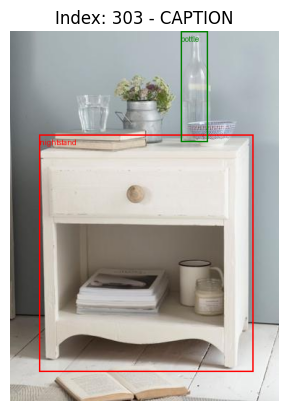

[('bottle', [0.598, 0.0, 0.67, 0.3])]


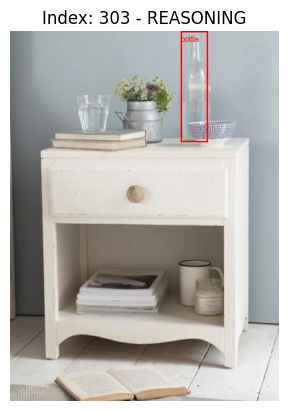

In [6]:
import random

# idex_list = indices_with_bbox.copy()
# random.seed(42)
# random.shuffle(idex_list)

index = 303
# visualize_sample(df, idex_list[index])
visualize_sample(df, index)


In [22]:
import json

def count_bboxes(data):
    total_bboxes = 0
    
    for entry in data:
        for conversation in entry.get("conversations", []):
            # 处理 <CAPTION> 和 <REASONING>
            if conversation['from'] == 'gpt':
                text = conversation.get("value", "")
                # 查找[ ]之间的内容并解析为bbox
                for bbox_text in text.split("]"):
                    if "[" in bbox_text:
                        try:
                            bbox_str = bbox_text.split("[")[-1].strip()
                            bbox = json.loads(f"[{bbox_str}]")
                            if len(bbox) == 4:  # 确保它确实是一个合法的 bbox
                                total_bboxes += 1
                        except json.JSONDecodeError:
                            continue  # 如果bbox格式错误，则跳过

    return total_bboxes

# 读取 JSON 文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/sampled_data_ibbox_iou3_nms1.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 统计 bbox 的数量
bbox_count = count_bboxes(data)
print(f"Total number of bboxes: {bbox_count}")

Total number of bboxes: 281877


In [23]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import matplotlib as mpl

# 配置matplotlib使用Agg后端，避免字体问题
mpl.use('Agg')

def calculate_iou(box1, box2):
    """Calculate the Intersection over Union (IoU) of two bounding boxes."""
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    return iou

# 打开JSON文件
file_path = '/mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/temp/ca-iou3-scale-nms.json'
with open(file_path, 'r') as f:
    data = json.load(f)

# 参考框 (全图)
reference_box = [0, 0, 1, 1]

# 创建字典来存储分类数据
category_data = defaultdict(lambda: {
    'total_boxes': 0,
    'iou_low': 0,  # IoU < 0.3
    'iou_mid': 0,  # 0.3 <= IoU < 0.7
    'iou_high': 0, # IoU >= 0.7
    'bbox_counts': [],  # 每个样本的bbox数量
    'unique_boxes': set(),  # 用于计算不重复的bbox
    'all_boxes': []  # 用于计算总bbox数量
})

# 处理每个样本
for sample_data in data:
    # 获取图片路径并提取第一级目录名作为类别
    image_path = sample_data.get("image", "")
    # 如果路径为空，跳过此样本
    if not image_path:
        continue
    
    # 提取第一级目录名作为类别
    path_parts = image_path.split('/')
    if len(path_parts) > 1:
        category = path_parts[0]  # 取第一级目录作为类别
    else:
        category = "uncategorized"
    
    # 样本中的bbox计数
    sample_box_count = 0
    
    # 处理对话中的数据
    for conversation in sample_data.get("conversations", []):
        if not conversation:
            continue
            
        # 检查caption和reasoning部分
        for attr in ["<CAPTION>", "<REASONING>"]:
            items = conversation.get(attr, [])
            if not items:
                continue
                
            for item in items:
                bbox = item.get("bbox", None)
                if bbox is not None:
                    sample_box_count += 1
                    category_data[category]['total_boxes'] += 1
                    category_data[category]['all_boxes'].append(bbox)
                    
                    # 将bbox转换为元组以便用作set的元素
                    bbox_tuple = tuple(bbox)
                    category_data[category]['unique_boxes'].add(bbox_tuple)
                    
                    # 计算与参考框的IoU并分类
                    iou = calculate_iou(bbox, reference_box)
                    if iou < 0.2:
                        category_data[category]['iou_low'] += 1
                    elif iou < 0.5:
                        category_data[category]['iou_mid'] += 1
                    else:
                        category_data[category]['iou_high'] += 1
    
    # 只有当样本中有bbox时才记录
    if sample_box_count > 0:
        category_data[category]['bbox_counts'].append(sample_box_count)

# 绘制圆环图
fig = plt.figure(figsize=(16, 12))
num_categories = len(category_data)
cols = 3
rows = (num_categories + cols - 1) // cols

# 设置新的配色方案
colors = ['#FF9999', '#66B2FF', '#99FF99']  # 红、蓝、绿

for i, (category, data) in enumerate(category_data.items(), 1):
    ax = plt.subplot(rows, cols, i)
    
    # 计算IoU统计数据
    iou_stats = [data['iou_low'], data['iou_mid'], data['iou_high']]
    total_iou = sum(iou_stats)
    
    if total_iou > 0:
        iou_percentages = [count / total_iou for count in iou_stats]
        labels = [f"<0.3: {iou_percentages[0]:.1%}", 
                 f"0.3-0.7: {iou_percentages[1]:.1%}", 
                 f">0.7: {iou_percentages[2]:.1%}"]
        
        # 绘制外环 - IoU分布
        ax.pie(iou_percentages, radius=1, colors=colors, 
              wedgeprops=dict(width=0.3, edgecolor='w'), 
              startangle=90, labels=labels)
        
        # 计算平均bbox数量
        avg_bbox_count = np.mean(data['bbox_counts']) if data['bbox_counts'] else 0
        
        # 计算不重复bbox比例
        unique_ratio = len(data['unique_boxes']) / data['total_boxes'] if data['total_boxes'] > 0 else 0
        
        # 绘制内环文本 - 使用英文
        ax.text(0, 0.2, f"Avg Boxes: {avg_bbox_count:.2f}", 
                ha='center', va='center', fontsize=10)
        ax.text(0, -0.2, f"Unique Ratio: {unique_ratio:.1%}", 
                ha='center', va='center', fontsize=10)
        
        # 绘制类别标题
        ax.set_title(f"{category}", fontsize=12)
        
        # 绘制中心白色圆圈
        circle = plt.Circle((0, 0), 0.7, fc='white')
        ax.add_patch(circle)
    else:
        ax.text(0, 0, "No Data", ha='center', va='center')

plt.tight_layout()
plt.savefig('category_bbox_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

# 打印汇总数据
print("Category Statistics Summary:")
print("=" * 80)
print(f"{'Category':<15} {'Total Boxes':<12} {'IoU<0.3':<10} {'IoU 0.3-0.7':<12} {'IoU>0.7':<10} {'Avg Boxes':<10} {'Unique Ratio':<10}")
print("-" * 80)
for category, data in sorted(category_data.items(), 
                            key=lambda x: x[1]['total_boxes'], reverse=True):
    total = data['total_boxes']
    if total > 0:
        iou_low_pct = data['iou_low'] / total
        iou_mid_pct = data['iou_mid'] / total
        iou_high_pct = data['iou_high'] / total
        avg_bbox = np.mean(data['bbox_counts']) if data['bbox_counts'] else 0
        unique_ratio = len(data['unique_boxes']) / total
        
        print(f"{category:<15} {total:<12} {iou_low_pct:.2%}     {iou_mid_pct:.2%}      {iou_high_pct:.2%}     {avg_bbox:.2f}      {unique_ratio:.2%}")
print("=" * 80)
print()

Category Statistics Summary:
Category        Total Boxes  IoU<0.3    IoU 0.3-0.7  IoU>0.7    Avg Boxes  Unique Ratio
--------------------------------------------------------------------------------
gqa             131683       77.93%     20.38%      1.69%     37.47      44.67%
coco            121334       67.73%     29.17%      3.10%     7.92      62.22%
ai2d            20499        92.88%     5.09%      2.03%     4.11      52.45%
textvqa         4356         81.29%     16.97%      1.74%     3.91      85.12%
pisc            2985         65.29%     32.03%      2.68%     3.47      85.33%
share_textvqa   98           83.67%     15.31%      1.02%     4.45      81.63%



In [24]:
import json
from collections import defaultdict

def count_avg_length(lst):
    total = sum(lst)
    count = len(lst)
    avg = total / count if count else 0
    return avg, count

def get_first_dir(image_path):
    # 假设路径用正斜杠分隔，比如 "coco/train2017/xxx.jpg"
    return image_path.split('/')[0]

with open('/mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/sampled_data_ibbox_nms.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 总统计
all_question_lens = []
all_answer_lens = []
total_qa_pairs = 0

# 按类别统计
category_stats = defaultdict(lambda: {
    'question_lens': [],
    'answer_lens': [],
    'qa_pairs': 0,
    'sample_count': 0
})

for sample in data:
    image = sample.get('image', '')
    category = get_first_dir(image)
    conversations = sample.get('conversations', [])
    category_stats[category]['sample_count'] += 1
    # 两两配对，一般假定conversations偶数且human/gpt交替
    for i in range(0, len(conversations), 2):
        if i+1 >= len(conversations):
            continue # 跳过无对partner的提问或回答
        q = conversations[i].get('value', '')
        a = conversations[i+1].get('value', '')
        # 统计长度
        q_len = len(q.split())
        a_len = len(a.split())
        all_question_lens.append(q_len)
        all_answer_lens.append(a_len)
        total_qa_pairs += 1
        # 分类别统计
        cat_stat = category_stats[category]
        cat_stat['question_lens'].append(q_len)
        cat_stat['answer_lens'].append(a_len)
        cat_stat['qa_pairs'] += 1

# 总体统计输出
avg_q, count_q = count_avg_length(all_question_lens)
avg_a, count_a = count_avg_length(all_answer_lens)
print(f"总体样本问答对总数: {total_qa_pairs}")
print(f"问题平均长度: {avg_q:.2f} 字符, 答案平均长度: {avg_a:.2f} 字符")

# 按类别统计输出
print("\n按图片路径的第一级目录分类：")
for cat, stat in category_stats.items():
    avg_q_cat, cnt_q_cat = count_avg_length(stat['question_lens'])
    avg_a_cat, cnt_a_cat = count_avg_length(stat['answer_lens'])
    print(f"类别: {cat}")
    print(f"  样本数（图片数量）: {stat['sample_count']}")
    print(f"  问答对总数: {stat['qa_pairs']}")
    print(f"  问题平均长度: {avg_q_cat:.2f} 字符, 答案平均长度: {avg_a_cat:.2f} 字符")


总体样本问答对总数: 75446
问题平均长度: 28.66 字符, 答案平均长度: 159.11 字符

按图片路径的第一级目录分类：
类别: coco
  样本数（图片数量）: 16303
  问答对总数: 34112
  问题平均长度: 28.87 字符, 答案平均长度: 168.47 字符
类别: ai2d
  样本数（图片数量）: 5698
  问答对总数: 5698
  问题平均长度: 40.98 字符, 答案平均长度: 175.11 字符
类别: gqa
  样本数（图片数量）: 3529
  问答对总数: 33465
  问题平均长度: 25.78 字符, 答案平均长度: 147.15 字符
类别: pisc
  样本数（图片数量）: 948
  问答对总数: 948
  问题平均长度: 34.77 字符, 答案平均长度: 172.03 字符
类别: textvqa
  样本数（图片数量）: 1200
  问答对总数: 1200
  问题平均长度: 39.72 字符, 答案平均长度: 137.42 字符
类别: share_textvqa
  样本数（图片数量）: 23
  问答对总数: 23
  问题平均长度: 24.30 字符, 答案平均长度: 313.52 字符


In [1]:
import json
import re

def has_bbox(text):
    """
    判断文本里是否有[float, float, float, float]形式的bbox
    """
    bbox_pattern = r"\[\s*\d*\.?\d+\s*,\s*\d*\.?\d+\s*,\s*\d*\.?\d+\s*,\s*\d*\.?\d+\s*\]"
    return bool(re.search(bbox_pattern, text))

def count_bbox(text):
    """
    统计文本里 bbox 的数量（形如[float, float, float, float]）
    """
    bbox_pattern = r"\[\s*\d*\.?\d+\s*,\s*\d*\.?\d+\s*,\s*\d*\.?\d+\s*,\s*\d*\.?\d+\s*\]"
    return len(re.findall(bbox_pattern, text))

with open("/mnt/pfs-mc0p4k/nlu/team/yuhaofu/model/GCotVLM/GCot_json/sampled_data_ibbox_iou3_nms1.json", "r", encoding="utf-8") as f:
    data = json.load(f)

image_total = 0
image_with_bbox = 0
total_bbox_per_image = 0

total_qa_pairs = 0
qa_with_bbox = 0
total_bbox_per_qa = 0

for item in data:
    image_total += 1
    image_has_bbox = False
    bbox_in_this_image = 0
    conversations = item.get("conversations", [])
    # 假设每组问答对为(human, gpt)
    for i in range(0, len(conversations), 2):
        if i + 1 < len(conversations):
            gpt_reply = conversations[i+1]["value"]
            bbox_count = count_bbox(gpt_reply)
            if bbox_count > 0:
                qa_with_bbox += 1
                image_has_bbox = True
            total_bbox_per_qa += bbox_count
            bbox_in_this_image += bbox_count
            total_qa_pairs += 1
    total_bbox_per_image += bbox_in_this_image
    if image_has_bbox:
        image_with_bbox += 1

# 比例防止除零异常
image_bbox_ratio = image_with_bbox / image_total if image_total else 0
qa_bbox_ratio = qa_with_bbox / total_qa_pairs if total_qa_pairs else 0
avg_bbox_per_image = total_bbox_per_image / image_total if image_total else 0
avg_bbox_per_qa = total_bbox_per_qa / total_qa_pairs if total_qa_pairs else 0

print(f"总图片数: {image_total}")
print(f"有bbox的图片数: {image_with_bbox}")
print(f"有bbox的图片占比: {image_bbox_ratio:.2%}")
print(f"总问答对数: {total_qa_pairs}")
print(f"有bbox的问答对数: {qa_with_bbox}")
print(f"有bbox的问答对占比: {qa_bbox_ratio:.2%}")
print(f"平均每张图片有bbox数: {avg_bbox_per_image:.3f}")
print(f"平均每对问答对有bbox数: {avg_bbox_per_qa:.3f}")

总图片数: 27701
有bbox的图片数: 25811
有bbox的图片占比: 93.18%
总问答对数: 75446
有bbox的问答对数: 70544
有bbox的问答对占比: 93.50%
平均每张图片有bbox数: 10.176
平均每对问答对有bbox数: 3.736
